<a href="https://colab.research.google.com/github/zeynepdinc12/TensorFlowDenemeleri/blob/main/BisikletVerisiTemelTensorFlow1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import seaborn as sb
import matplotlib.pyplot as plt

#Veri düzenleme için kullanılan ekler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler                #minimum ve maksimum skaler değerleri için sklearn'den ön işleme kütüphanesini yükle
from sklearn.metrics import  mean_absolute_error, mean_squared_error         #ortalama ve ortalama kareler hatası
from keras.models import load_model                                     #kurduğumuz modeli kaydetmeyi sağlayan tensorflow frameworkü

#Tensorflow içindeki ekler
from keras.models import Sequential
from keras.layers import Dense

data=pd.read_excel('/content/bisiklet_fiyatlari.xlsx')
data.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fiyat             1000 non-null   float64
 1   BisikletOzellik1  1000 non-null   float64
 2   BisikletOzellik2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


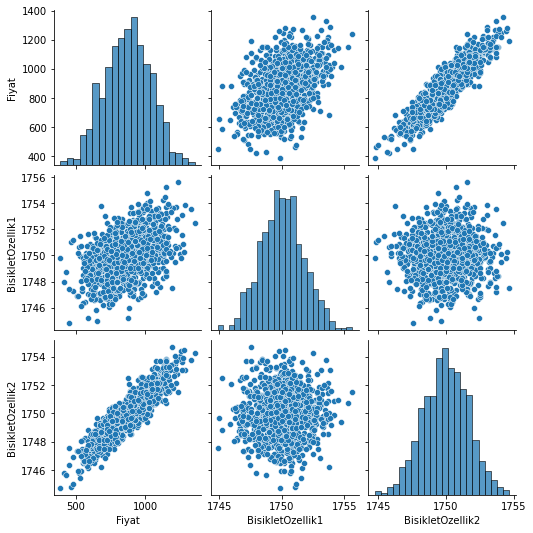

In [ ]:
data.info()
sb.pairplot(data=data)                                    #data.info() nun grafik hali histogram şeklinde filan veriyor. güzel özellik, kullanmalı.

In [ ]:
#y=vx+b
#yekseni etiket, xekseni özellik
yekseni=data["Fiyat"].values                  #yeksenim fiyatlardan oluşacak

xekseni=data[["BisikletOzellik1","BisikletOzellik2"]].values      #xekseni özelliklerden

xtrain,xtest,ytrain,ytest=train_test_split(xekseni,yekseni,test_size=0.5,random_state=15)           #verisetini (eksenleri) xtest, ytest, xeğitim(xtrain)
                                                                                                    #ve yeğitim(ytrain) olarak bölüyoruz.
                                                                                                    #test_size belirlenen değerde bölünecek.
                                                                                                    #random_state sayısı kadar farklı bölmeden oluşacak bölümler       
xtrain.shape                                                                                        #2 demesinin nedeni x için 2 sutun olması
xtrain

array([[1751.663061, 1752.024913],
       [1747.055188, 1750.611427],
       [1747.213841, 1751.482907],
       [1750.540791, 1750.363451],
       [1749.46386 , 1752.553139],
       [1750.122967, 1747.977026],
       [1750.796695, 1750.088337],
       [1750.74747 , 1753.458831],
       [1751.618324, 1751.862201],
       [1750.437864, 1752.385543],
       [1752.634462, 1749.644042],
       [1751.098358, 1749.572701],
       [1749.44953 , 1752.288523],
       [1750.446807, 1751.454306],
       [1750.994284, 1748.688214],
       [1753.655102, 1751.800615],
       [1749.536367, 1749.495598],
       [1747.759868, 1751.210373],
       [1750.403934, 1749.2369  ],
       [1746.959075, 1752.501414],
       [1750.234413, 1749.911731],
       [1749.419019, 1751.276294],
       [1749.355564, 1748.173734],
       [1750.936518, 1751.667647],
       [1749.417185, 1749.481991],
       [1750.561133, 1751.286435],
       [1750.005335, 1748.500451],
       [1751.323537, 1750.237474],
       [1749.350955,

In [ ]:
ytrain.shape
ytrain

array([1111.857366 ,  814.061551 ,  894.5890742,  939.9691706,
       1090.245875 ,  718.0200329,  901.6266048, 1216.391126 ,
       1109.934513 , 1090.345367 ,  930.4083931,  869.5583342,
       1056.025118 , 1014.121514 ,  790.762734 , 1198.877864 ,
        816.3578511,  880.6282464,  831.9017301,  990.3883509,
        873.6216146,  957.7326352,  682.8661644, 1069.508365 ,
        784.7521757, 1022.514764 ,  758.4686205,  957.3775171,
        789.2081251,  759.9817449,  900.2098715,  917.6495921,
        638.4911887,  847.1904158,  775.5771059,  807.4163757,
       1058.393916 , 1027.788598 , 1090.432788 ,  598.6033654,
        983.5045088,  679.0456123,  701.1111657,  769.3884454,
        896.0871365, 1139.943226 ,  775.6082   ,  792.2853739,
        847.9801838,  939.3954013,  785.7956219,  974.07127  ,
        743.9357773,  737.6916143,  978.3266243,  752.3519727,
       1061.020383 ,  724.5070093,  815.4996614,  603.7706849,
        902.6122804,  676.955265 ,  955.5429676,  838.0

In [ ]:
xtest.shape
xtest

array([[1751.019597, 1751.83637 ],
       [1749.850949, 1747.23938 ],
       [1750.837436, 1749.641408],
       [1748.122661, 1751.075311],
       [1747.681905, 1751.334307],
       [1744.852108, 1747.557549],
       [1750.011526, 1750.636771],
       [1749.739643, 1751.4407  ],
       [1752.565167, 1749.593997],
       [1750.554861, 1751.357784],
       [1750.476569, 1748.39139 ],
       [1752.232041, 1749.481392],
       [1748.698879, 1751.415976],
       [1751.351626, 1751.425194],
       [1753.219701, 1751.333079],
       [1748.861024, 1748.339681],
       [1749.073117, 1753.273118],
       [1746.676821, 1748.9829  ],
       [1748.802237, 1753.70773 ],
       [1750.747411, 1749.799949],
       [1750.202097, 1750.117751],
       [1751.532764, 1747.527424],
       [1751.047864, 1744.812098],
       [1746.699053, 1748.533473],
       [1751.230408, 1748.999284],
       [1752.054496, 1751.51916 ],
       [1748.955692, 1748.660546],
       [1748.990107, 1749.131719],
       [1748.831913,

In [ ]:
ytest.shape
ytest

array([1081.652164 ,  622.6759897,  889.3568099,  902.8267326,
        897.6624037,  452.6270656,  932.100396 ,  995.073078 ,
        934.9101422, 1010.262616 ,  748.5472089,  915.2910235,
        954.7741048, 1067.014716 , 1108.539693 ,  680.3066064,
       1130.95375  ,  660.7482456, 1151.00769  ,  896.6488749,
        895.4654565,  724.2764591,  464.3079611,  612.0064901,
        849.1433579, 1097.915483 ,  708.5805338,  765.0681455,
        883.2143188,  777.0957125,  450.9959952,  790.6573017,
        733.4466132,  652.3605123,  900.9986371,  838.3161182,
       1035.131269 , 1013.999754 ,  847.402171 ,  869.3197636,
        759.4971728, 1182.580471 , 1105.231214 , 1096.68957  ,
        886.9410788,  593.6214077, 1146.934956 ,  966.6278005,
       1052.867368 ,  855.9680151,  804.8686544,  862.6378589,
        794.195197 , 1014.003646 , 1029.424693 ,  952.3172926,
        941.3755485, 1083.433374 ,  888.010185 , 1007.451493 ,
        801.111406 ,  833.3412067,  727.0252231,  880.0

In [ ]:
scaller=MinMaxScaler()
scaller.fit(xtrain)                             #x eğitim ve test seti normalize edilir. (0-1) arasına alınır
scaller.fit(xtest)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
xtrain=scaller.transform(xtrain)                     
xtest=scaller.transform(xtest)                    #x eğitim ve test verisetleri yeni hallerini alır

In [ ]:
xtrain       #eğitim veri setim normalize olduktan sonra

array([[0.68798568, 0.7664052 ],
       [0.22253677, 0.61765141],
       [0.23856258, 0.70936506],
       [0.57462332, 0.59155468],
       [0.46584073, 0.82199515],
       [0.53241823, 0.34040981],
       [0.60047261, 0.56260197],
       [0.59550031, 0.91730923],
       [0.68346672, 0.74928156],
       [0.5642265 , 0.80435752],
       [0.78610851, 0.51584483],
       [0.63094409, 0.50833698],
       [0.46439324, 0.79414724],
       [0.56512984, 0.70635512],
       [0.62043141, 0.41525449],
       [0.88920506, 0.74280031],
       [0.47316479, 0.50022274],
       [0.29371767, 0.68068386],
       [0.56079917, 0.47299763],
       [0.21282824, 0.81655167],
       [0.54367557, 0.54401614],
       [0.46131127, 0.68762132],
       [0.45490158, 0.36111115],
       [0.61459637, 0.7288069 ],
       [0.46112602, 0.49879075],
       [0.5766781 , 0.68868855],
       [0.52053602, 0.39549451],
       [0.6536898 , 0.57829699],
       [0.45443601, 0.47006083],
       [0.31467961, 0.49914593],
       [0.

In [ ]:
xtest       #test veri setim normalize olduktan sonra

array([[0.62298831, 0.74656313],
       [0.50494124, 0.26278072],
       [0.60458793, 0.51556763],
       [0.33036399, 0.66647008],
       [0.2858425 , 0.69372655],
       [0.        , 0.29626449],
       [0.52116139, 0.62031859],
       [0.49369803, 0.70492324],
       [0.77910891, 0.51057815],
       [0.57604456, 0.69619724],
       [0.56813615, 0.38401704],
       [0.7454593 , 0.49872771],
       [0.38856873, 0.70232131],
       [0.65652712, 0.7032914 ],
       [0.84522448, 0.69359731],
       [0.40494727, 0.37857524],
       [0.42637113, 0.89776499],
       [0.18431729, 0.44626694],
       [0.3990091 , 0.9435031 ],
       [0.59549435, 0.53225232],
       [0.54041128, 0.56569747],
       [0.67482417, 0.29309417],
       [0.62584361, 0.0073361 ],
       [0.18656298, 0.39896971],
       [0.64428268, 0.44799117],
       [0.72752518, 0.71318028],
       [0.41450984, 0.41234274],
       [0.41798616, 0.46192849],
       [0.40200672, 0.60801058],
       [0.43835122, 0.46864116],
       [0.

In [ ]:
model=Sequential()
model.add(Dense(5,activation="relu"))                 #yapay nöronumu (preton) ekliyorum. Dense içine kaç nöron ve aktivasyon türünübelirtiyorsun. Modelde kaç katman istiyorsak o kadar model.add yapılır
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="rmsprop",loss="mse")         #modeli optimizasyonu rmsprop ile mse kullanarak derle

In [ ]:
model.fit(xtrain,ytrain,epochs=250)               #250 kez tekrarla  öğretim setiyle

Epoch 1/250
16/16 [==============================] - 1s 1ms/step - loss: 797631.0882
Epoch 2/250
16/16 [==============================] - 0s 1ms/step - loss: 805982.9081
Epoch 3/250
16/16 [==============================] - 0s 2ms/step - loss: 796346.6985
Epoch 4/250
16/16 [==============================] - 0s 2ms/step - loss: 784622.8309
Epoch 5/250
16/16 [==============================] - 0s 1ms/step - loss: 776728.8088
Epoch 6/250
16/16 [==============================] - 0s 2ms/step - loss: 800781.3125
Epoch 7/250
16/16 [==============================] - 0s 1ms/step - loss: 784975.0625
Epoch 8/250
16/16 [==============================] - 0s 1ms/step - loss: 808248.8088
Epoch 9/250
16/16 [==============================] - 0s 2ms/step - loss: 791215.3529
Epoch 10/250
16/16 [==============================] - 0s 1ms/step - loss: 776807.7279
Epoch 11/250
16/16 [==============================] - 0s 1ms/step - loss: 775397.0110
Epoch 12/250
16/16 [==============================] - 0s 1ms/st

In [ ]:
loss=model.history.history["loss"]                 #yukarıdaki 250 veriyi dizi haline getir
loss

[795813.9375,
 795403.5625,
 794885.125,
 794219.875,
 793378.3125,
 792342.5625,
 791082.1875,
 789608.9375,
 787865.5625,
 785805.5,
 783401.5625,
 780629.875,
 777414.5,
 773715.75,
 769504.8125,
 764707.1875,
 759259.4375,
 753151.125,
 746292.25,
 738606.375,
 730027.25,
 720528.1875,
 709960.5,
 698308.0625,
 685520.4375,
 671628.3125,
 656532.875,
 640171.625,
 622523.8125,
 603390.0625,
 582756.8125,
 560677.125,
 537005.875,
 511955.53125,
 485287.375,
 457233.03125,
 427873.53125,
 397042.125,
 365345.84375,
 332802.65625,
 299433.65625,
 265472.96875,
 231755.25,
 198262.40625,
 165540.640625,
 134073.703125,
 104375.5703125,
 77385.0,
 54083.953125,
 34770.85546875,
 20180.638671875,
 10682.9033203125,
 6193.99169921875,
 4933.39111328125,
 4800.171875,
 4675.35693359375,
 4612.21142578125,
 4457.50927734375,
 4316.0361328125,
 4211.93408203125,
 4090.885986328125,
 3946.02783203125,
 3818.6875,
 3732.985107421875,
 3591.277587890625,
 3459.554443359375,
 3327.75634765625,


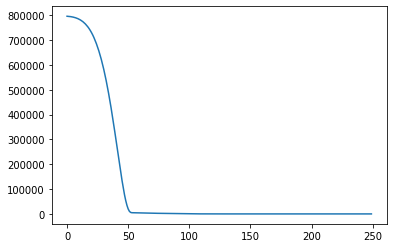

In [ ]:
sb.lineplot(x=range(len(loss)),y=loss)              #loss'un grafiğini çiz

In [ ]:
trainloss=model.evaluate(xtrain,ytrain,verbose=0)   #eğitim kümesi kayıpları/sapmaları 0 a yaklaşması iyi 
trainloss

80.582763671875

In [ ]:
testloss=model.evaluate(xtest,ytest,verbose=0)
testloss                                #test kayıplarım/ sapmalarım

72.8047866821289

In [ ]:
testtahminleri=model.predict(xtest)
testtahminleri                            #test verilerimi modelime yolladım

array([[1080.3127 ],
       [ 625.52936],
       [ 878.2422 ],
       [ 896.5595 ],
       [ 901.85785],
       [ 453.2108 ],
       [ 933.42725],
       [ 993.8532 ],
       [ 943.3506 ],
       [1019.2021 ],
       [ 752.8484 ],
       [ 919.99426],
       [ 949.9047 ],
       [1057.1492 ],
       [1123.9216 ],
       [ 683.4455 ],
       [1129.706  ],
       [ 652.89056],
       [1157.4022 ],
       [ 888.698  ],
       [ 895.01935],
       [ 718.5612 ],
       [ 458.11908],
       [ 613.90424],
       [ 837.0312 ],
       [1093.6855 ],
       [ 715.7144 ],
       [ 758.903  ],
       [ 875.72455],
       [ 772.6512 ],
       [ 452.80002],
       [ 785.0011 ],
       [ 730.22107],
       [ 648.66473],
       [ 888.95435],
       [ 845.9408 ],
       [1038.1512 ],
       [1025.3359 ],
       [ 847.002  ],
       [ 864.4212 ],
       [ 759.09015],
       [1177.3615 ],
       [1100.1682 ],
       [1090.3358 ],
       [ 875.18414],
       [ 598.305  ],
       [1148.5682 ],
       [ 975.

In [ ]:
tahmindf=pd.DataFrame(ytest,columns=["Gerçek Test"])
tahmindf

,Gerçek Test
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
495,693.343999
496,981.186591
497,714.500853
498,906.960468


In [ ]:
testtahminleri=pd.Series(testtahminleri.reshape(500,))
testtahminleri

0      1080.312744
1       625.529358
2       878.242188
3       896.559509
4       901.857849
          ...     
495     698.389526
496     964.385071
497     715.999817
498     908.784302
499    1050.810303
Length: 500, dtype: float32

In [ ]:
tahmindf=pd.concat([tahmindf,testtahminleri],axis=1)
tahmindf.columns=["Gerçek Y","Tahmin Y"]
tahmindf                        #gerçekler vs. tahminler

,Gerçek Y,Tahmin Y
0,1081.652164,1080.312744
1,622.675990,625.529358
2,889.356810,878.242188
3,902.826733,896.559509
4,897.662404,901.857849
...,...,...
495,693.343999,698.389526
496,981.186591,964.385071
497,714.500853,715.999817
498,906.960468,908.784302


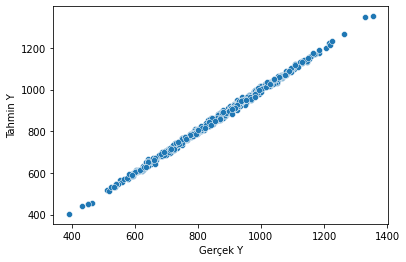

In [ ]:
sb.scatterplot(x="Gerçek Y",y="Tahmin Y",data=tahmindf)       #tahminler ve gerçeklerin tablosu

In [ ]:
mean_absolute_error(tahmindf["Gerçek Y"],tahmindf["Tahmin Y"])        #ortalama hata

6.814061467392967

In [ ]:
mean_squared_error(tahmindf["Gerçek Y"],tahmindf["Tahmin Y"])         #ortalama kareler hatası

72.80478360280013

In [ ]:
data.describe()             #ana veri ile genel bilgiler (test verisi seçmekte yardımcı olsun diye)

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115766,1751.129414
max,1355.213745,1755.613884,1754.666038


In [ ]:
yenibisiklet=[[1750.5,1750.5]]
yenibisiklet=scaller.transform(yenibisiklet)
yenibisiklet                                  #kendi uydurduğumuz bir değeri verdik ve normalize ettik.

array([[0.57050296, 0.60592495]])

In [ ]:
model.predict(yenibisiklet)                   #modele elle kendi belirlediğimiz bir değeri verdik sonucunu görmek için

array([[940.88855]], dtype=float32)

In [ ]:
model.save("bisikletmodeli.h5")                     #modeli kaydettik

In [ ]:
modelisonrakullan=load_model("bisikletmodeli.h5")   #modeli tekrar yükledik

In [ ]:
modelisonrakullan(yenibisiklet)                   #modeli tekrar kullanalınca yine test verimizle aynı sonucu verdi.

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1083.4963]], dtype=float32)>